# Análise Exploratória dos Dados

### Importação das Bibliotecas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import mplfinance as mpf

### Importação da Base de Dados

In [7]:
########################
## REVISAR ESSE PONTO ##
########################
file_path = 'C:/Users/biel_/OneDrive/Documentos/Faculdade/Fase 3/amazon_stock_ml/HistoricalData_1731547025648.csv'
data = pd.read_csv(file_path)

### Tratamento das Variáveis

In [8]:
# Remover o símbolo '$' e substituir ',' por '.' nas colunas de preços, convertendo-as para float
columns_to_convert = ['Close/Last', 'Open', 'High', 'Low']

for col in columns_to_convert:
    data[col] = data[col].replace('[\$,]', '', regex=True).str.replace(',', '.').astype(float)

# Conversão da coluna 'Date' para datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Verificar se a conversão foi bem-sucedida
print(data[columns_to_convert].dtypes)
print(data.head())

Close/Last    float64
Open          float64
High          float64
Low           float64
dtype: object
        Date  Close/Last    Volume    Open      High     Low
0 2024-11-12      208.91  38942920  208.37  209.5400  206.01
1 2024-11-11      206.84  35456010  208.50  209.6500  205.59
2 2024-11-08      208.18  36075850  209.72  209.9633  207.44
3 2024-11-07      210.05  52878380  207.44  212.2500  207.19
4 2024-11-06      207.09  72292170  200.01  207.5500  199.14


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\biel_\AppData\Local\Temp\ipykernel_20520\1998124349.py:5: SyntaxWarning: invalid escape sequence '\$'
  data[col] = data[col].replace('[\$,]', '', regex=True).str.replace(',', '.').astype(float)


### Análise das Informações

In [9]:
# Exibir informações iniciais sobre os dados
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
 2   Volume      2516 non-null   int64         
 3   Open        2516 non-null   float64       
 4   High        2516 non-null   float64       
 5   Low         2516 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB
None


In [10]:
# Ordenar por data para análises temporais
data = data.sort_values(by='Date')

In [11]:
# Exibir informações iniciais sobre os dados
print(data.head())

           Date  Close/Last     Volume     Open     High      Low
2515 2014-11-13     15.8240   73468080  15.6000  15.8945  15.5755
2514 2014-11-14     16.3910  177480340  15.8560  16.6440  15.8201
2513 2014-11-17     16.1525   95481300  16.3220  16.4000  15.9015
2512 2014-11-18     16.2465   70783220  16.1995  16.4780  16.1625
2511 2014-11-19     16.3270   65472540  16.3625  16.4200  16.2010


In [12]:
# Estatísticas Descritivas Básicas
print("\nEstatísticas Descritivas Básicas:")
print(data.describe())


Estatísticas Descritivas Básicas:
                                Date   Close/Last        Volume         Open  \
count                           2516  2516.000000  2.516000e+03  2516.000000   
mean   2019-11-13 21:17:27.376788480    98.593584  7.650424e+07    98.621575   
min              2014-11-13 00:00:00    14.347500  1.762674e+07    14.314000   
25%              2017-05-15 18:00:00    47.438500  5.123984e+07    47.431125   
50%              2019-11-12 12:00:00    93.542000  6.564395e+07    93.664750   
75%              2022-05-12 06:00:00   151.707375  9.025775e+07   151.820625   
max              2024-11-12 00:00:00   210.050000  4.769344e+08   209.720000   
std                              NaN    53.349772  4.031742e+07    53.385731   

              High          Low  
count  2516.000000  2516.000000  
mean     99.740618    97.396403  
min      14.539500    14.262500  
25%      47.753750    47.067275  
50%      94.701750    92.638000  
75%     153.986475   149.759500  
max   

### Análise Estátisca da Base

In [13]:
# Médias, Medianas e Modas
print("\nMédia dos valores de fechamento:")
print(data['Close/Last'].mean())


Média dos valores de fechamento:
98.59358390302067


In [14]:
print("\nMediana dos valores de fechamento:")
print(data['Close/Last'].median())


Mediana dos valores de fechamento:
93.542


In [15]:
print("\nModa dos valores de fechamento:")
print(data['Close/Last'].mode()[0])


Moda dos valores de fechamento:
125.98


In [16]:
# Verificar se os dados estão balanceados
print("\nValores ausentes em cada coluna:")
print(data.isnull().sum())


Valores ausentes em cada coluna:
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [17]:
# Estatísticas de esparcividade
sparsity = (data.isnull().sum().sum() / data.size) * 100
print(f"\nPercentual de esparcividade: {sparsity:.2f}%")


Percentual de esparcividade: 0.00%


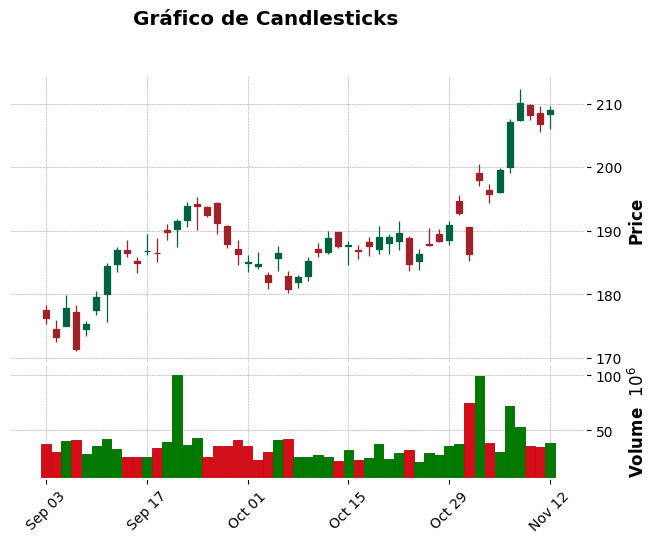

In [18]:
#Analisar volumes e variações - disperção intrad
candle = data.loc[:,['Date','Close/Last', 'Open', 'High', 'Low','Volume']].rename(columns={'Close/Last':'Close'})
candle = candle.set_index('Date')

# Plotando o gráfico de candlesticks
mpf.plot(candle.loc[candle.index>'2024-08-31',:], type='candle', style='charles', title='Gráfico de Candlesticks', volume=True)

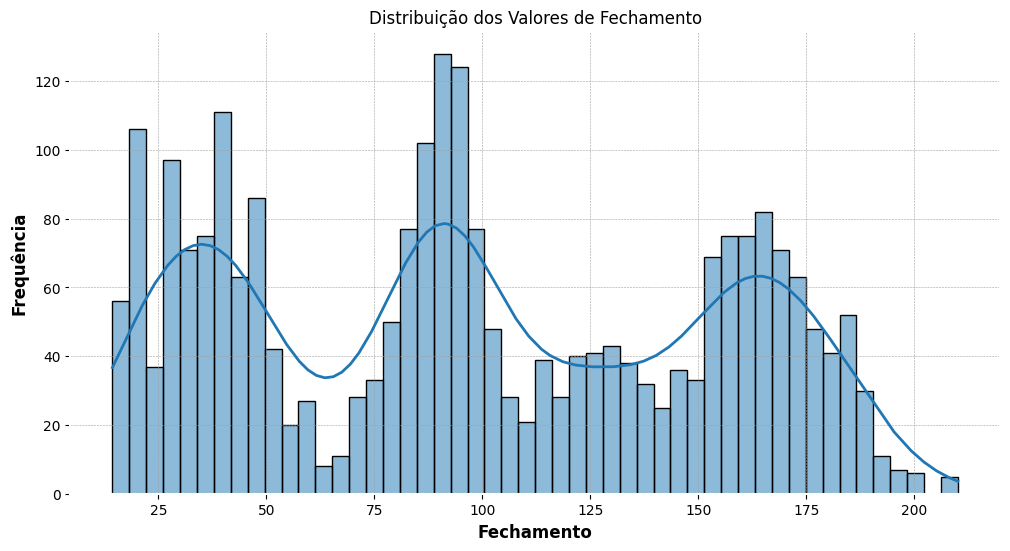

In [19]:
# Visualização da Distribuição dos Dados sobre valores de fechamento
plt.figure(figsize=(12, 6))
sns.histplot(data['Close/Last'], bins=50, kde=True)
plt.title('Distribuição dos Valores de Fechamento')
plt.xlabel('Fechamento')
plt.ylabel('Frequência')
plt.show()

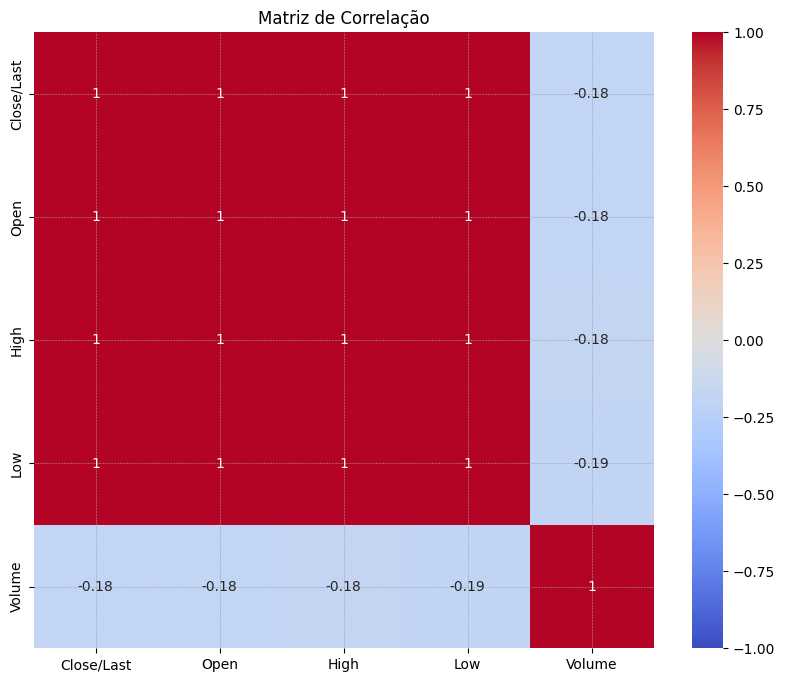

In [20]:
# Análise de Correlação - Analise que as variáveis estão extremamente correlacionadas e com vazamento de dados. 
correlation_matrix = data[['Close/Last', 'Open', 'High', 'Low', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

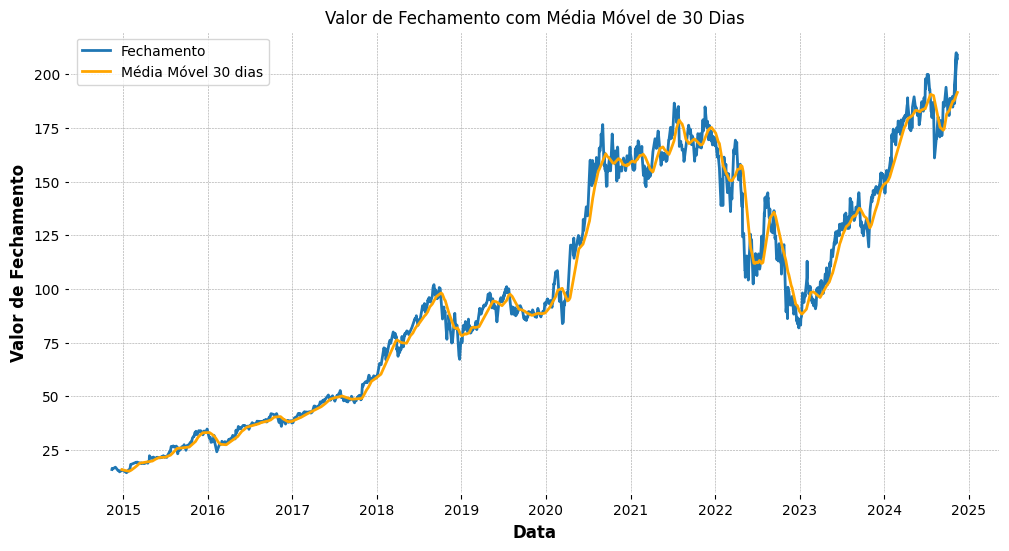

In [21]:
# Média móvel de 30 dias do fechamento
data['Close_Moving_Avg_30'] = data['Close/Last'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close/Last'], label='Fechamento')
plt.plot(data['Date'], data['Close_Moving_Avg_30'], label='Média Móvel 30 dias', color='orange')
plt.title('Valor de Fechamento com Média Móvel de 30 Dias')
plt.xlabel('Data')
plt.ylabel('Valor de Fechamento')
plt.legend()
plt.show()

### Análise de Retornos Diários

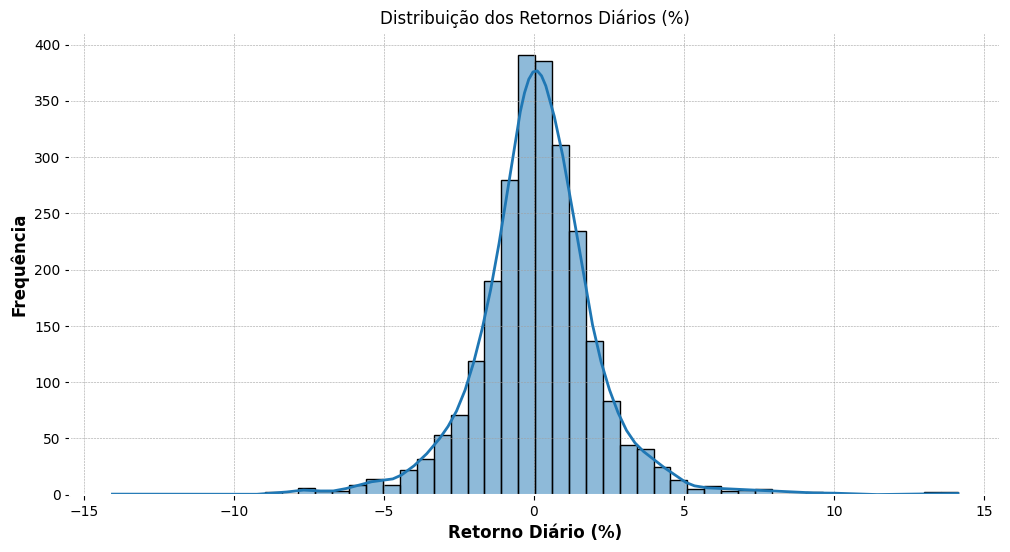

In [22]:
#Cálculo do retorno diário percentual da ação (métrica importante para avaliar a volatilidade do ativo)

data['Daily_Return'] = data['Close/Last'].pct_change() * 100
plt.figure(figsize=(12, 6))
sns.histplot(data['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('Distribuição dos Retornos Diários (%)')
plt.xlabel('Retorno Diário (%)')
plt.ylabel('Frequência')
plt.show()

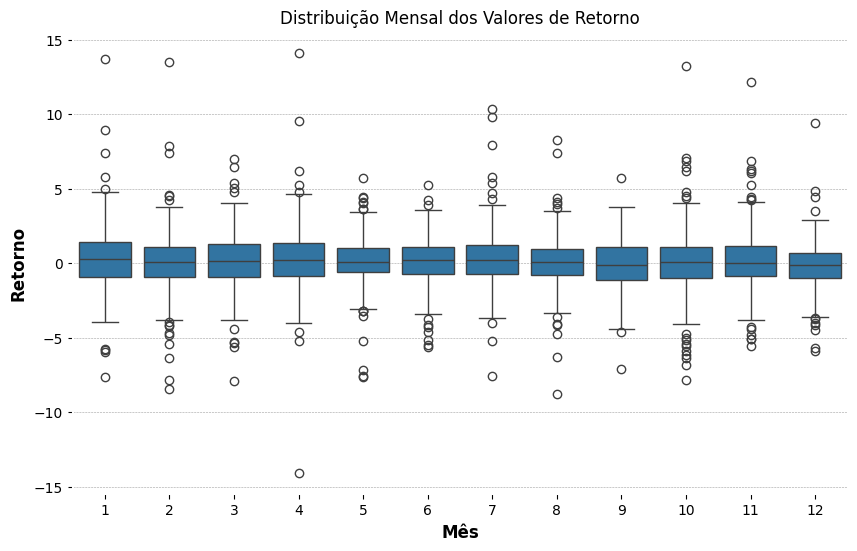

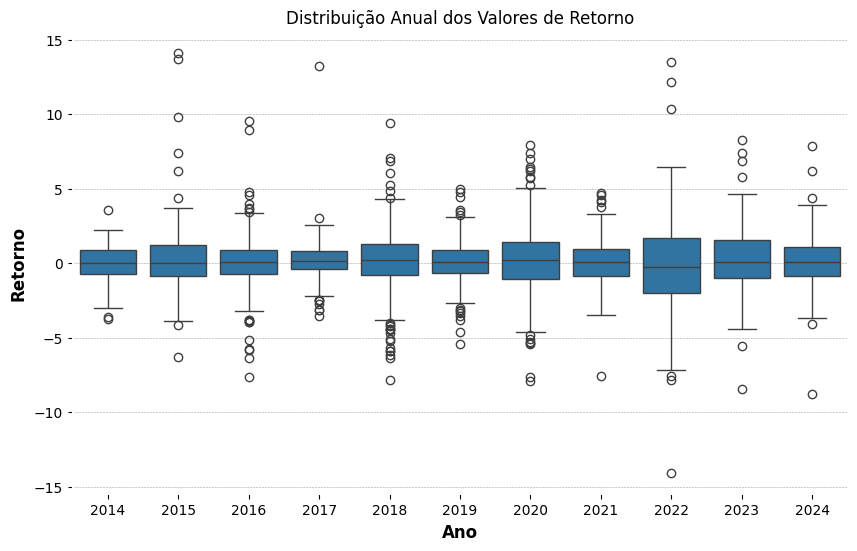

In [23]:
# Análise de sazonalidade por mês e ano
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Daily_Return', data=data)
plt.title('Distribuição Mensal dos Valores de Retorno')
plt.xlabel('Mês')
plt.ylabel('Retorno')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Daily_Return', data=data)
plt.title('Distribuição Anual dos Valores de Retorno')
plt.xlabel('Ano')
plt.ylabel('Retorno')
plt.show()

#2022 É o único ano que apresenta uma variabilidade maior com um disperção maior do primeiro e terceiro quartis

### Análise de Volatilidade

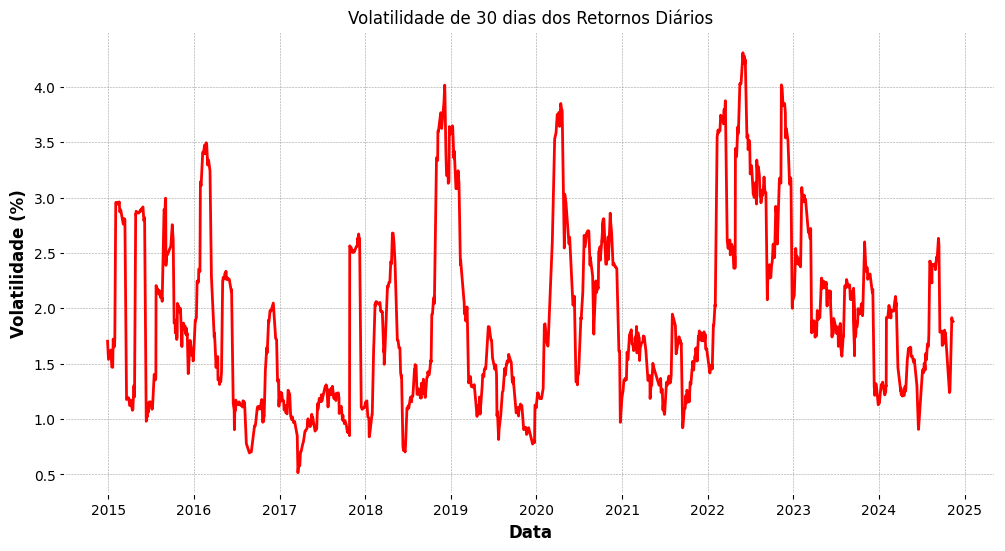

In [24]:
#Cálculo da volatilidade dos preços de fechamento em janelas móveis (ex: 30 dias) para verificar variações ao longo do tempo.
#Quanto de volatilidade estou tendo? Desvio padrão do retorno (risco da ação)

data['Volatilidade_30d'] = data['Daily_Return'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volatilidade_30d'], color='red')
plt.title('Volatilidade de 30 dias dos Retornos Diários')
plt.xlabel('Data')
plt.ylabel('Volatilidade (%)')
plt.show()

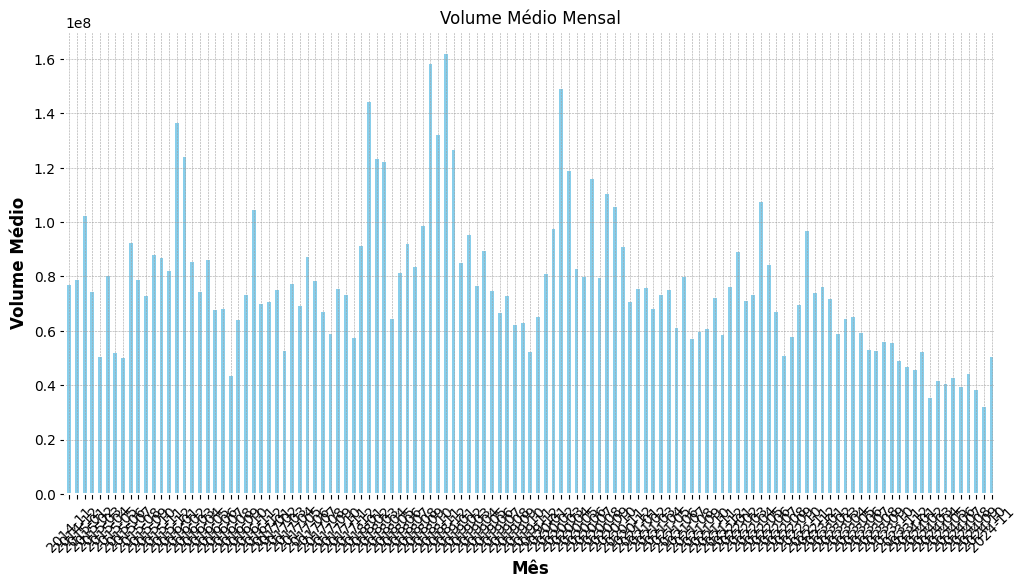

In [25]:
#Volume Médio por Mês
#Verificação da média do volume de ações negociadas por mês, o que pode indicar períodos de maior interesse no ativo.

monthly_volume = data.groupby(data['Date'].dt.to_period("M"))['Volume'].mean()
plt.figure(figsize=(12, 6))
monthly_volume.plot(kind='bar', color='skyblue')
plt.title('Volume Médio Mensal')
plt.xlabel('Mês')
plt.ylabel('Volume Médio')
plt.xticks(rotation=45)
plt.show()

#A compra e venda parece bem estável, com apenas alguns picos. 

In [26]:
# #Análise de Tendência com Decomposição Sazonal
# #Use uma decomposição sazonal para observar componentes de tendência, sazonalidade e resíduos no preço de fechamento. Essa análise ajuda a identificar se há padrões sazonais ou ciclos no histórico.

# # Remova valores nulos para a decomposição
# close_data = data['Close/Last'].dropna()
# decomposition = seasonal_decompose(close_data, model='additive', period=30)

# plt.figure(figsize=(14, 10))
# decomposition.plot()
# plt.show()


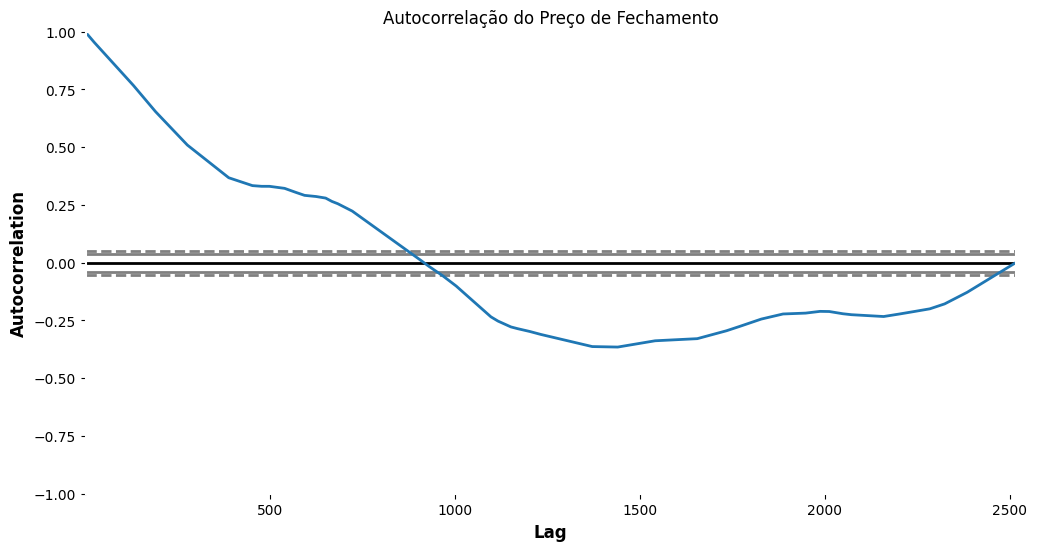

In [27]:
#Análise de Correlação Temporal com Lag (Atraso)
#Análise da autocorrelação dos preços de fechamento para ver se há algum padrão temporal que se repete.

plt.figure(figsize=(12, 6))
autocorrelation_plot(data['Close/Last'].dropna())
plt.title('Autocorrelação do Preço de Fechamento')
plt.show()

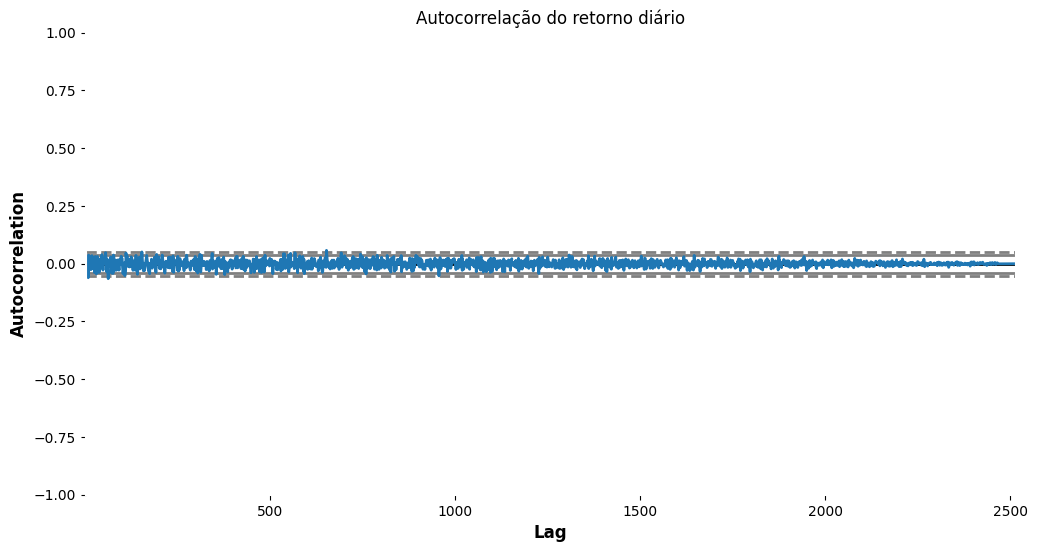

In [28]:
#Análise de Correlação Temporal com Lag (Atraso)
#Analise a autocorrelação dos preços de fechamento para ver se há algum padrão temporal que se repete.

plt.figure(figsize=(12, 6))
autocorrelation_plot(data['Daily_Return'].dropna())
plt.title('Autocorrelação do retorno diário')
plt.show()

#Variação sobre o retorno da ação % percentual de variação diária, não tem muita correlação com retorno. 
#Isso em finanças pode ser chamado de passeio aleatório que é quando o retorno da ação amanhã não pode ser explicado pelos retornos dos dias anteriores.  

In [29]:
data['forca_relativa'] = (data['Close/Last'] - data['Low'])/ (data['High'] - data['Low'])

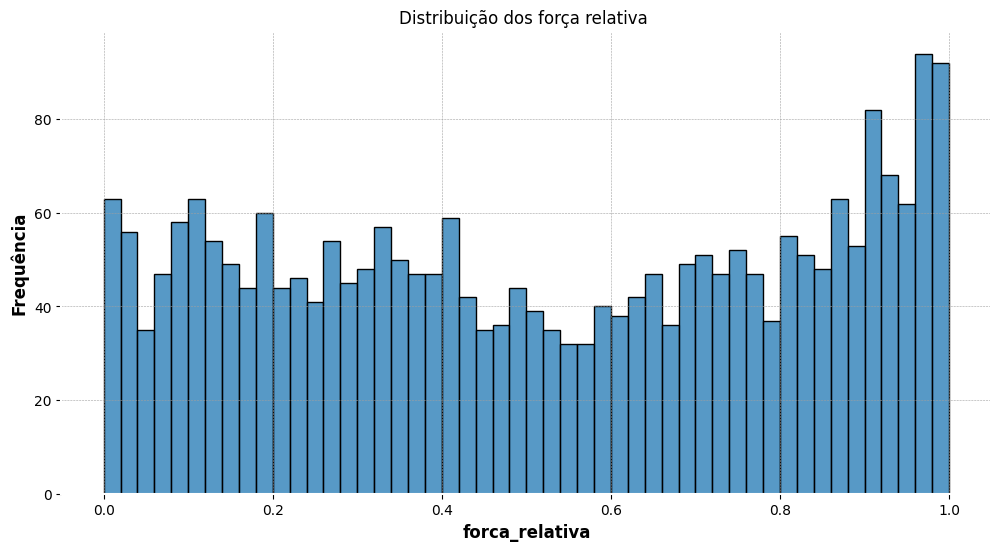

In [30]:
# Análise de como o fechamento se compara com a maxima e minima do dia 
# 0 - Minima 
# 1 - Maxima

plt.figure(figsize=(12, 6))
sns.histplot(data['forca_relativa'].dropna(), bins=50, kde=False)
plt.title('Distribuição dos força relativa ')
plt.xlabel('forca_relativa')
plt.ylabel('Frequência')
plt.show()

# Não há uma tendência clara do fechamento em relação a máximo e mínima 

In [31]:
data['forca_relativa'].describe()

count    2516.000000
mean        0.522034
std         0.310050
min         0.000000
25%         0.248713
50%         0.517561
75%         0.813204
max         1.000000
Name: forca_relativa, dtype: float64

## Analisando o conjunto com a variável resposta do modelo

In [32]:
forecast_days=21 

threshold=0.01 
# Criar variável alvo
dataset = data.copy()    
    
dataset['Future_Return'] = (dataset['Close/Last'].shift(-forecast_days) - dataset['Close/Last']) / dataset['Close/Last']
dataset['Target'] = (dataset['Future_Return'] > threshold).astype(int)

# Remover valores nulos
dataset.dropna(inplace=True)

# Criar features adicionais
dataset['SMA_20'] = dataset['Future_Return'].rolling(window=20,closed='left').mean()
dataset['SMA_50'] = dataset['Future_Return'].rolling(window=50,closed='left').mean()
dataset['Volatility_30'] = dataset['Future_Return'].rolling(window=30,closed='left').std()
dataset['Avg_Volume_30'] = dataset['Volume'].rolling(window=30,closed='left').mean()
dataset['forca_relativa_30'] = dataset['forca_relativa'].rolling(window=30,closed='left').mean()    

In [33]:
#Tirando os missings 
dataset.dropna(inplace=True)

In [34]:
dataset[['Target','SMA_20', 'SMA_50', 'Volatility_30', 'Avg_Volume_30','forca_relativa_30']].describe()

,Target,SMA_20,SMA_50,Volatility_30,Avg_Volume_30,forca_relativa_30
count,2415.000000,2415.000000,2415.000000,2415.000000,2.415000e+03,2415.000000
mean,0.616563,0.024076,0.024400,0.056260,7.686037e+07,0.523013
std,0.486324,0.070594,0.050501,0.028659,2.432013e+07,0.053822
min,0.000000,-0.270402,-0.128890,0.013164,3.371659e+07,0.379957
25%,0.000000,-0.014855,-0.003222,0.035233,6.002256e+07,0.485403
50%,1.000000,0.028708,0.026949,0.051548,7.273066e+07,0.520474
75%,1.000000,0.065549,0.058274,0.070735,8.812950e+07,0.558235
max,1.000000,0.245458,0.135177,0.179314,1.595049e+08,0.695629


In [35]:
#Dados desbalanceados - se está subindo conforme nossa target no tempo determinado 
dataset.Target.value_counts(normalize=True) 

Target
1    0.616563
0    0.383437
Name: proportion, dtype: float64

                     Target    SMA_20    SMA_50  Volatility_30  Avg_Volume_30  \
Target             1.000000  0.443054  0.281421      -0.187676      -0.032302   
SMA_20             0.443054  1.000000  0.681017      -0.094630      -0.001918   
SMA_50             0.281421  0.681017  1.000000      -0.188898      -0.102911   
Volatility_30     -0.187676 -0.094630 -0.188898       1.000000       0.330155   
Avg_Volume_30     -0.032302 -0.001918 -0.102911       0.330155       1.000000   
forca_relativa_30  0.179075  0.375412  0.523032      -0.176992      -0.076628   

                   forca_relativa_30  
Target                      0.179075  
SMA_20                      0.375412  
SMA_50                      0.523032  
Volatility_30              -0.176992  
Avg_Volume_30              -0.076628  
forca_relativa_30           1.000000  


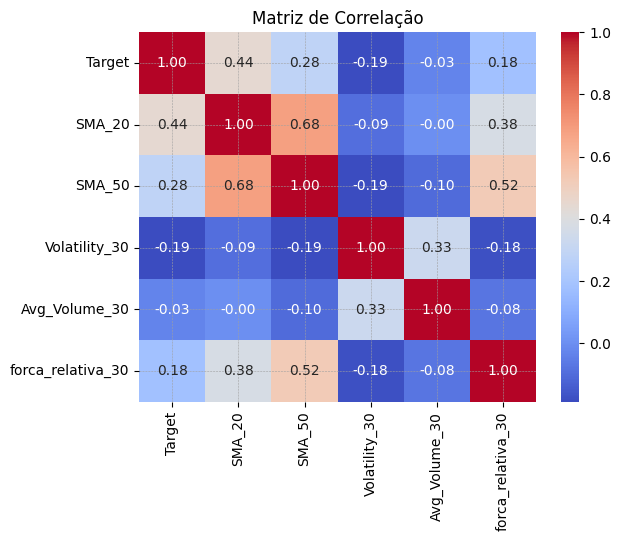

In [36]:
# Matriz de correlação
correlation_matrix = dataset[['Target','SMA_20', 'SMA_50', 'Volatility_30', 'Avg_Volume_30','forca_relativa_30']].corr()
print(correlation_matrix)

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

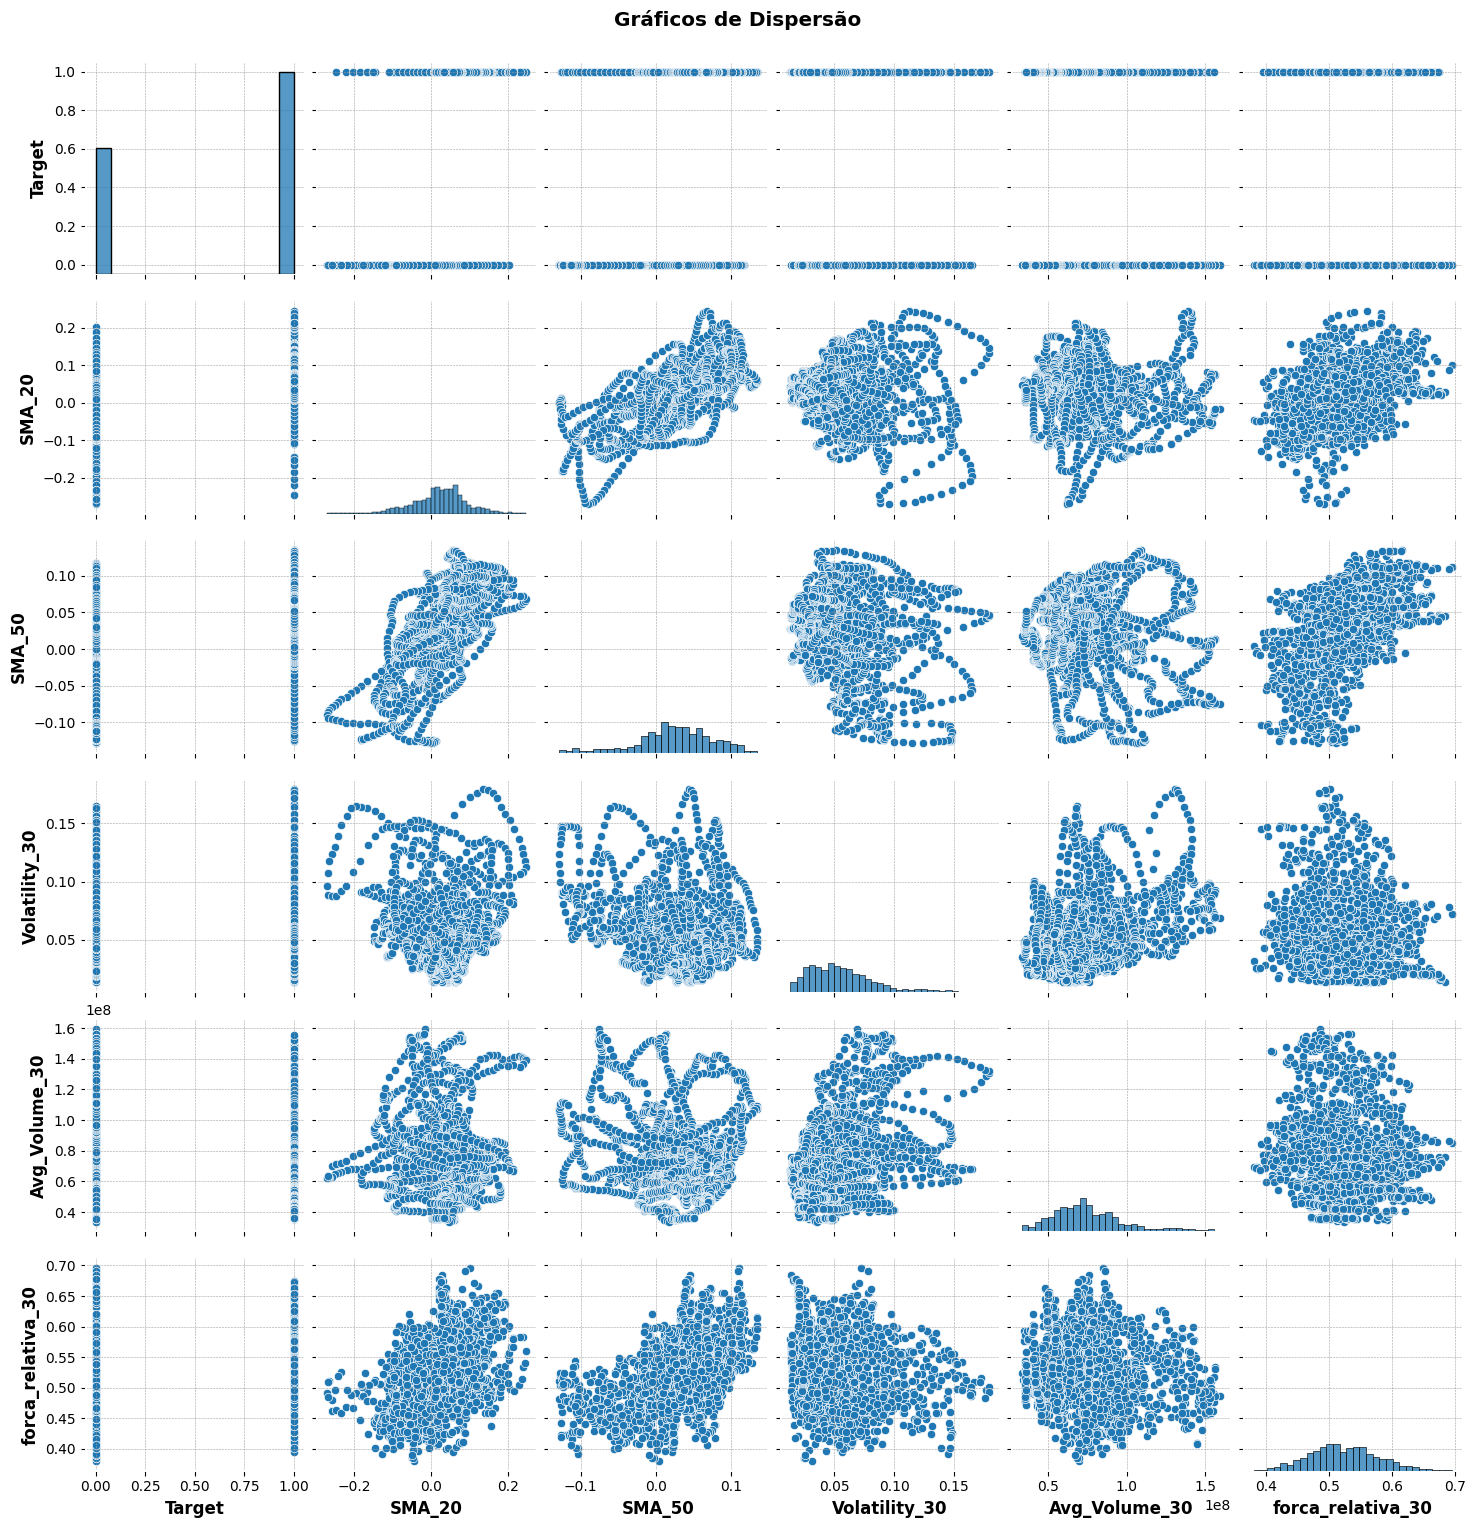

In [37]:
# Pares de dispersão
sns.pairplot(dataset[['Target','SMA_20', 'SMA_50', 'Volatility_30', 'Avg_Volume_30','forca_relativa_30']])
plt.suptitle("Gráficos de Dispersão", y=1.02)
plt.show()